In [10]:
# Load packages.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Load data.
data = pd.read_excel('Table S5.xlsx', sheet_name = "Table S5C")
data = data.drop(0)
data_part = data[["Q2","Q4","Q5","Q6","Q7","Q8"]]

In [12]:
# Extract class label.
y = pd.Series(data["Class"])
y = y.replace("FLA", 'tomato')
y = y.replace('ISO', 'darkslateblue')

In [16]:
# PCA
pca = PCA(n_components = 3).fit(data_part)
x_pca = pca_train.fit_transform(data_part)

In [20]:
# Obtain the contribution rate of each feature to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.80980083, 0.16345859, 0.0186067 ])

In [21]:
# Calculate the contribution of each principal component.
variable_contribution = np.multiply(explained_variance_ratio[:, np.newaxis], pca.components_ ** 2)
variable_contribution

array([[1.84823836e-02, 5.62866517e-01, 3.09513605e-03, 2.08816925e-01,
        3.09513605e-03, 1.34447348e-02],
       [4.95087999e-03, 4.96428919e-02, 1.55250687e-03, 1.01123753e-01,
        1.55250687e-03, 4.63605553e-03],
       [1.48620902e-02, 2.26875244e-05, 3.74132429e-05, 1.49919064e-03,
        3.74132429e-05, 2.14790400e-03]])

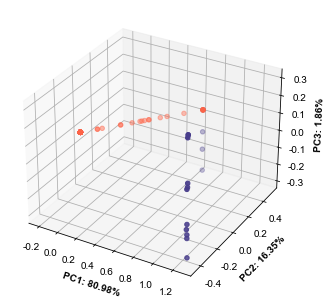

In [18]:
# Three-dimensional PCA score plot.
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=y)
str1list = "PC1: %.2f" % round(pca.explained_variance_ratio_[0]*100,2)+"%"
str2list = "PC2: %.2f" % round(pca.explained_variance_ratio_[1]*100,2)+"%"
str3list = "PC3: %.2f" % round(pca.explained_variance_ratio_[2]*100,2)+"%"
ax.set_xlabel(str1list, size=10, weight='bold')
ax.set_ylabel(str2list, size=10, weight='bold')
ax.set_zlabel(str3list, size=10, weight='bold')
plt.savefig("PCA score.svg",dpi=2000, bbox_inches = 'tight')
plt.show()

In [22]:
def contri(x):
    total_ = np.sum(x,axis=1,keepdims=True)
    return x/total_

In [24]:
# Calculate the contribution of each principal component.
variable_contribution = np.multiply(explained_variance_ratio[:, np.newaxis], pca.components_ ** 2)
variable_contribution = contri(variable_contribution)*100
variable_contribution

array([[ 2.28233695, 69.50678417,  0.38220954, 25.78620775,  0.38220954,
         1.66025204],
       [ 3.0288282 , 30.37031627,  0.94978602, 61.86505725,  0.94978602,
         2.83622624],
       [79.87494356,  0.12193202,  0.20107405,  8.05726287,  0.20107405,
        11.54371344]])

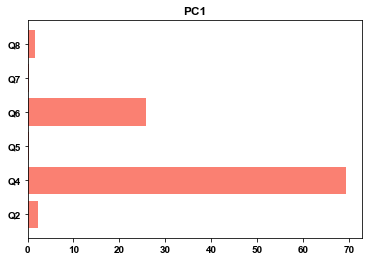

In [25]:
# PCA loading plot of PC1.
import matplotlib
import matplotlib.colors as mcolors
matplotlib.rc('font', family='Arial', weight='bold')
fig, ax = plt.subplots()
b = ax.barh(range(1, data_part.shape[1]+1), 
            variable_contribution[0,:], 
            color='salmon',
            ) 
name = [0,"Q2","Q4","Q5","Q6","Q7","Q8"]
ax.set_yticklabels(name)
plt.title('PC1', loc='center', fontsize='12',fontweight='bold', color='black')
plt.savefig("PC1.svg",dpi=2000, bbox_inches = 'tight')
plt.show()

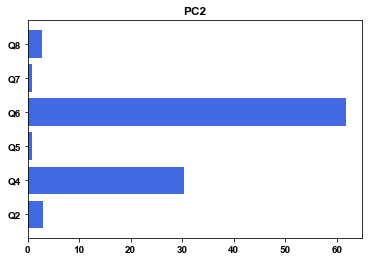

In [26]:
# PCA loading plot of PC2.
import matplotlib
import matplotlib.colors as mcolors
matplotlib.rc('font', family='Arial', weight='bold')
fig, ax = plt.subplots()
b = ax.barh(range(1, data_part.shape[1]+1), 
            variable_contribution[1,:], 
            color='royalblue',
            ) 
name = [0,"Q2","Q4","Q5","Q6","Q7","Q8"]
ax.set_yticklabels(name)
plt.title('PC2', loc='center', fontsize='12',fontweight='bold', color='black')
plt.savefig("PC2.svg",dpi=2000, bbox_inches = 'tight')
plt.show()

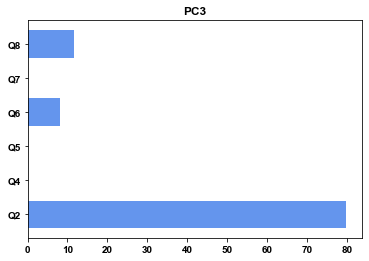

In [27]:
# PCA loading plot of PC3.
import matplotlib
import matplotlib.colors as mcolors
matplotlib.rc('font', family='Arial', weight='bold')
fig, ax = plt.subplots()
b = ax.barh(range(1, data_part.shape[1]+1), 
            variable_contribution[2,:], 
            color='cornflowerblue',
            ) 
name = [0,"Q2","Q4","Q5","Q6","Q7","Q8"]
ax.set_yticklabels(name)
plt.title('PC3', loc='center', fontsize='12',fontweight='bold', color='black')
plt.savefig("PC3.svg",dpi=2000, bbox_inches = 'tight')
plt.show()